In [1]:
import time
import numpy as np
from constants import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from build_model import model_tools

X = np.load('Norm_MinMax_10_X.npy')
y = np.load('Norm_MinMax_10_y.npy')

labels = np.unique(y)

le = LabelEncoder()
le.fit(y)
le_y = np.array(le.transform(y))
le_y = le_y.reshape((-1, 1))

ohe = OneHotEncoder()
ohe.fit(le_y)

y = ohe.transform(le_y).toarray()

In [2]:
model = model_tools(X, y, test_size=0.4)

Model: "lstm_keras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 34        
Total params: 2,146
Trainable params: 2,146
Non-trainable params: 0
_________________________________________________________________


321 [==============================] - 1s 4ms/step - loss: 0.6247 - accuracy: 0.6760 - auc: 0.7178 - val_loss: 0.7272 - val_accuracy: 0.5163 - val_auc: 0.7237 - lr: 0.0010
Epoch 6/100
321/321 [==============================] - 1s 4ms/step - loss: 0.5057 - accuracy: 0.7632 - auc: 0.8445 - val_loss: 0.3039 - val_accuracy: 0.8930 - val_auc: 0.9647 - lr: 0.0010
Epoch 7/100
321/321 [==============================] - 1s 4ms/step - loss: 0.3451 - accuracy: 0.8910 - auc: 0.9317 - val_loss: 0.2878 - val_accuracy: 0.8791 - val_auc: 0.9603 - lr: 0.0010
Epoch 8/100
321/321 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8536 - auc: 0.9282 - val_loss: 0.2455 - val_accuracy: 0.8977 - val_auc: 0.9671 - lr: 0.0010
Epoch 9/100
321/321 [==============================] - 1s 4ms/step - loss: 0.3165 - accuracy: 0.8785 - auc: 0.9396 - val_loss: 0.2507 - val_accuracy: 0.8930 - val_auc: 0.9672 - lr: 0.0010
Epoch 10/100
321/321 [==============================] - 1s 4ms/step - loss: 

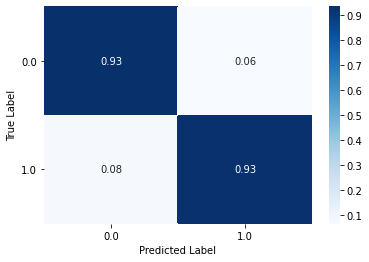

In [3]:
if not os.path.isdir(result_dir):  # For training
    os.mkdir(result_dir)
model.fit_and_save_model(es=False, mc=False, rlr=True, log=True)

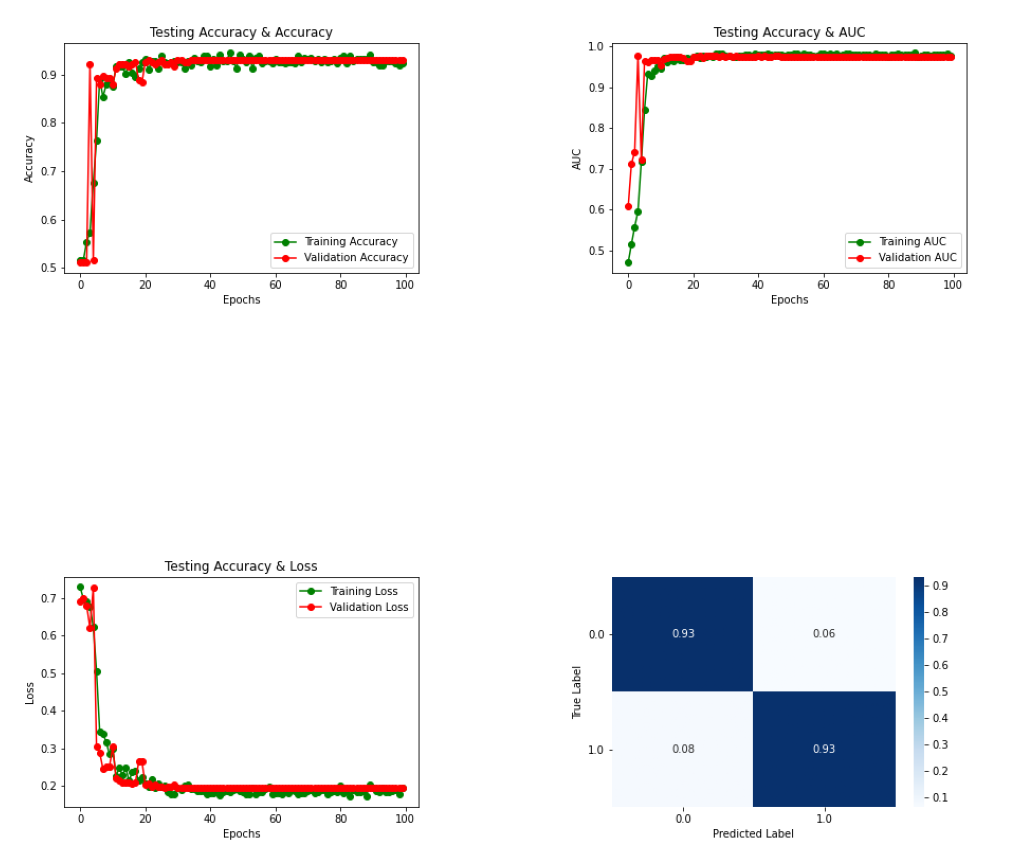

In [4]:
model.plt_fig()